In [9]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading Data Method 1: Upload
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Students Social Media Addiction.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

Saving Students Social Media Addiction.csv to Students Social Media Addiction (2).csv
Dataset Loaded Successfully!
Shape: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
#Check for existing files

!ls  # Shows files in current directory

!ls -la  # Shows files in current directory

 cleaned_data.csv	   sample_data
 malaysian_dashboard.png  'Students Social Media Addiction.csv'
total 456
drwxr-xr-x 1 root root   4096 Feb 15 09:00  .
drwxr-xr-x 1 root root   4096 Feb 15 07:07  ..
-rw-r--r-- 1 root root  49115 Feb 15 07:16  cleaned_data.csv
drwxr-xr-x 4 root root   4096 Jan 16 14:24  .config
drwxr-xr-x 2 root root   4096 Feb 15 09:00  .ipynb_checkpoints
-rw-r--r-- 1 root root 341517 Feb 15 08:46  malaysian_dashboard.png
drwxr-xr-x 1 root root   4096 Jan 16 14:24  sample_data
-rw-r--r-- 1 root root  49821 Feb 15 07:08 'Students Social Media Addiction.csv'


In [ ]:
#Data Clean

# Fill numeric columns with mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(f"Shape after filling numeric NaNs: {df.shape}")

# Fill text columns with mode
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(f"Shape after filling text NaNs: {df.shape}")

# Count duplicates
initial_duplicates = df.duplicated().sum()
print(f"Total duplicates before removal: {initial_duplicates}")

# See duplicate rows (if any)
if initial_duplicates > 0:
    duplicates = df[df.duplicated(keep=False)]  # keep=False shows all dupes
    print("Sample of duplicate rows:")
    print(duplicates.head())

# Remove duplicates (keeping first occurrence)
df = df.drop_duplicates()
print(f"Final shape after cleaning (NaNs filled, duplicates removed): {df.shape}")

Shape after filling numeric NaNs: (705, 13)
Shape after filling text NaNs: (705, 13)
Total duplicates before removal: 0
Final shape after cleaning (NaNs filled, duplicates removed): (705, 13)


In [31]:
#Data Filter

# Clean 'Country' column: strip spaces and convert to title case
df['Country'] = df['Country'].str.strip().str.title()

# Re-calculate and display country distribution
country_distribution_cleaned = df['Country'].value_counts()
print("Distribution of Students by Country (After Cleaning):")
print(country_distribution_cleaned)

# Check if Malaysia is now present
if 'Malaysia' in country_distribution_cleaned.index:
    print(f"\nMalaysia is now present with {country_distribution_cleaned['Malaysia']} students.")
else:
    print("\nMalaysia is still not found in the dataset after cleaning.")

Distribution of Students by Country (After Cleaning):
Country
India          53
Usa            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

Malaysia is now present with 8 students.


In [33]:
overall_avg_mental_health_score = df['Mental_Health_Score'].mean()
malaysia_avg_mental_health_score = 6.25

mental_health_comparison = pd.Series({
    'Country': overall_avg_mental_health_score,
    'Malaysia': malaysia_avg_mental_health_score
})

print("Average Mental Health Score Comparison:")
print(mental_health_comparison)

Average Mental Health Score Comparison:
Country     6.22695
Malaysia    6.25000
dtype: float64


In [34]:
mean_addiction = malaysia_df["Addicted_Score"].mean()
mean_mental = malaysia_df["Mental_Health_Score"].mean()

r, p = pearsonr(
    malaysia_df["Addicted_Score"],
    malaysia_df["Mental_Health_Score"]
)

X = sm.add_constant(malaysia_df["Addicted_Score"])
y = malaysia_df["Mental_Health_Score"]
model = sm.OLS(y, X).fit()
r_squared = model.rsquared

print("Mean Addiction Score:", round(mean_addiction,2))
print("Mean Mental Health Score:", round(mean_mental,2))
print("Correlation (r):", round(r,3))
print("P-value:", round(p,5))
print("R-squared:", round(r_squared,3))

Mean Addiction Score: 6.5
Mean Mental Health Score: 6.25
Correlation (r): -1.0
P-value: 0.0
R-squared: 1.0


/tmp/ipython-input-3954926663.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_avg = malaysia_df.groupby("Addiction_Level")[


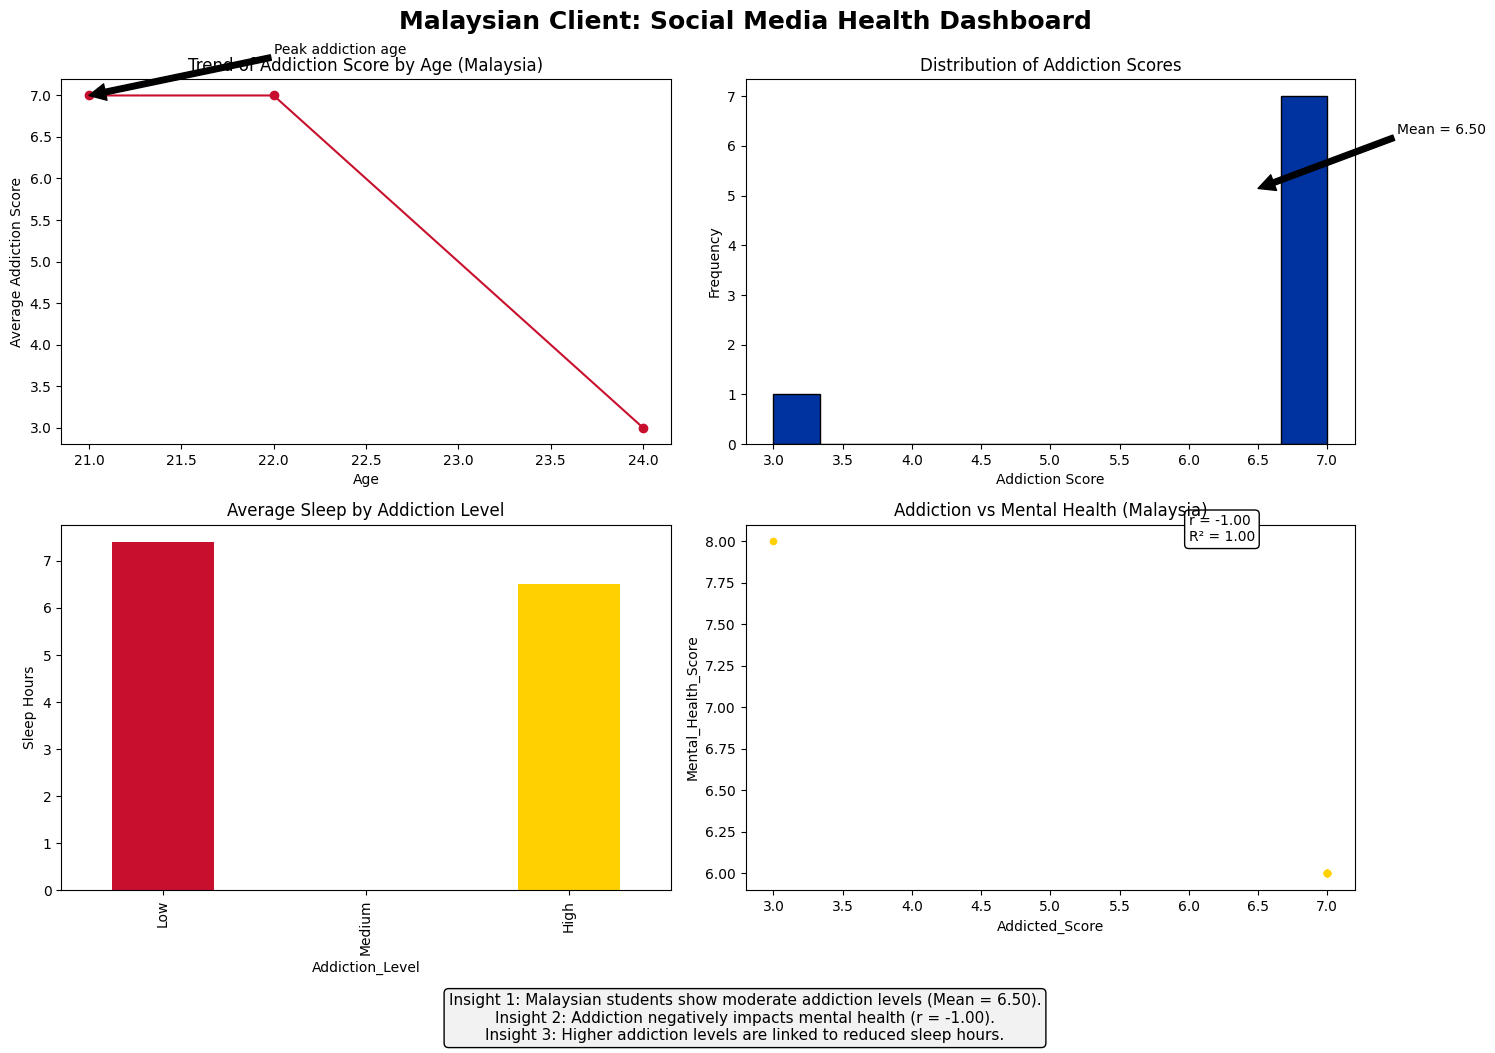

In [35]:
# Malaysian Dashhboard

# Malaysian inspired colours
red = "#C8102E"
blue = "#0033A0"
yellow = "#FFD100"

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# -------------------------
# Plot 1: Addiction Trend by Age

avg_addiction_by_age = malaysia_df.groupby("Age")["Addicted_Score"].mean()

avg_addiction_by_age.plot(
    kind="line",
    marker="o",
    color=red,
    ax=axes[0,0]
)

axes[0,0].set_title("Trend of Addiction Score by Age (Malaysia)")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Average Addiction Score")

axes[0,0].annotate(
    "Peak addiction age",
    xy=(avg_addiction_by_age.idxmax(), avg_addiction_by_age.max()),
    xytext=(avg_addiction_by_age.idxmax()+1, avg_addiction_by_age.max()+0.5),
    arrowprops=dict(facecolor='black')
)

# -------------------------
# Plot 2: Addiction Distribution

malaysia_df["Addicted_Score"].plot(
    kind="hist",
    bins=12,
    color=blue,
    edgecolor="black",
    ax=axes[0,1]
)

axes[0,1].set_title("Distribution of Addiction Scores")
axes[0,1].set_xlabel("Addiction Score")

axes[0,1].annotate(
    f"Mean = {mean_addiction:.2f}",
    xy=(mean_addiction, axes[0,1].get_ylim()[1]*0.7),
    xytext=(mean_addiction+1, axes[0,1].get_ylim()[1]*0.85),
    arrowprops=dict(facecolor='black')
)

# -------------------------
# Plot 3: Sleep by Addiction Level

malaysia_df["Addiction_Level"] = pd.cut(
    malaysia_df["Addicted_Score"],
    bins=3,
    labels=["Low", "Medium", "High"]
)

sleep_avg = malaysia_df.groupby("Addiction_Level")[
    "Sleep_Hours_Per_Night"
].mean()

sleep_avg.plot(
    kind="bar",
    color=[red, blue, yellow],
    ax=axes[1,0]
)

axes[1,0].set_title("Average Sleep by Addiction Level")
axes[1,0].set_ylabel("Sleep Hours")

# -------------------------
# Plot 4: Addiction vs Mental Health

malaysia_df.plot(
    kind="scatter",
    x="Addicted_Score",
    y="Mental_Health_Score",
    color=yellow,
    ax=axes[1,1]
)

axes[1,1].set_title("Addiction vs Mental Health (Malaysia)")

axes[1,1].annotate(
    f"r = {r:.2f}\nR² = {r_squared:.2f}",
    xy=(mean_addiction, mean_mental),
    xytext=(6, 8),
    bbox=dict(boxstyle="round", fc="white", ec="black")
)

plt.suptitle(
    "Malaysian Client: Social Media Health Dashboard",
    fontsize=18,
    fontweight="bold"
)

# -------------------------
# INSIGHT TEXT (Under Dashboard)

insight_text = (
    f"Insight 1: Malaysian students show moderate addiction levels "
    f"(Mean = {mean_addiction:.2f}).\n"
    f"Insight 2: Addiction negatively impacts mental health "
    f"(r = {r:.2f}).\n"
    f"Insight 3: Higher addiction levels are linked to reduced sleep hours."
)

plt.figtext(
    0.5, -0.05,
    insight_text,
    ha="center",
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="#f2f2f2", edgecolor="black")
)

plt.tight_layout()


In [37]:
plt.suptitle('''Malaysian Client: Social Media Health Dashboard
''', fontsize=18)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/malaysian_dashboard.png')
print(" Dashboard saved to Google Drive!")

 Dashboard saved to Google Drive!


<Figure size 640x480 with 0 Axes>

In [40]:

# PROJECT: Social Media Addiction Analysis (Malaysia Focus)
# Name: Muhamad Khairel bin Manangin
# Course: Data Science Bootcamp
# Description:
# This project analyses social media addiction levels
# among Malaysian students and investigates its impact
# on mental health and sleep behaviour using statistical analysis
# and dashboard visualization.

